# 📊 Statistical Analysis Report: Superstore Business Insights
## Executive Summary

Based on a comprehensive statistical analysis of the Superstore dataset using **Python**, the following strategic insights have been derived:

1. **The Furniture Profitability Crisis:** An Independent **T-test** confirmed a statistically significant difference ($P\text{-value} < 0.05$) between Technology and Furniture profits. This proves that Furniture losses are not random but a systemic issue requiring a pricing and strategy overhaul.
2. **Regional Performance Disparity:** **ANOVA** and **Tukey’s HSD Test** identified the **Central Region** as the statistically significant underperformer. This indicates a need for operational review in this specific territory.
3. **Category-Region Interaction:** A **Two-Way ANOVA** revealed a strong interaction between Region and Category. Profitability is not uniform; certain categories perform significantly better or worse depending on their location, suggesting that a "one-size-fits-all" strategy is ineffective.
4. **The "Discount Trap" Impact:** The **Linear Regression** model showed a strong negative correlation between Discounts and Profits. The model can now predict net profit for future deals based on sales volume and discount rates with high reliability.
5. **Statistical Reliability & Forecasting:** Using **95% Confidence Intervals**, we have established a reliable range for expected average profits, providing leadership with a data-backed safety margin for financial planning.
6. **Time Series & Seasonality:** Analysis of sales trends over time identified clear seasonal peaks, particularly in Q4, allowing for better inventory and resource allocation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df=pd.read_excel('/content/superstore1.xlsx')
sns.set(style='whitegrid')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


In [2]:
profit_stats = {
    'mean':df['Profit'].mean(),
    'median':df['Profit'].median(),
    'Skewness': df['Profit'].skew(),
    'std_dev':df['Profit'].std()
}
print(f"Profit Anslysis: {profit_stats}")

Profit Anslysis: {'mean': np.float64(28.65689630778467), 'median': 8.6665, 'Skewness': np.float64(7.561431562468343), 'std_dev': 234.26010769095757}


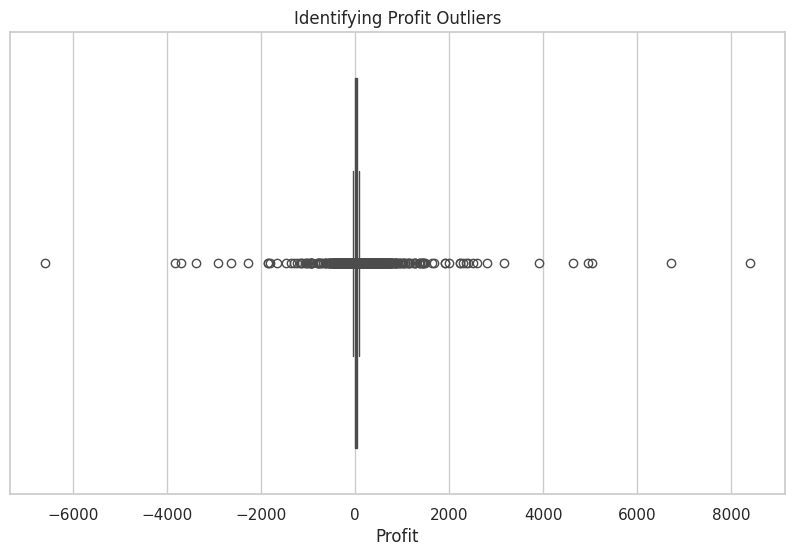

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df['Profit'])
plt.title("Identifying Profit Outliers")
plt.show()

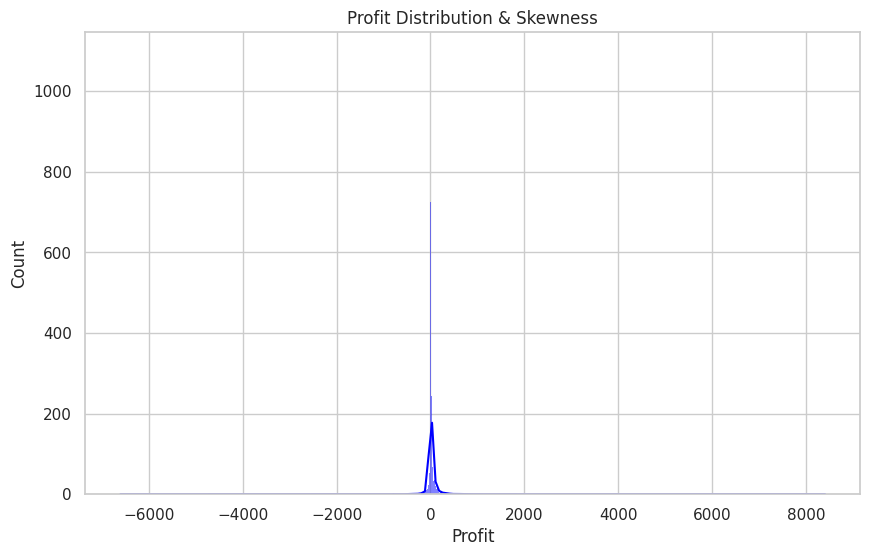

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True, color='blue')
plt.title('Profit Distribution & Skewness')
plt.show()

--- Hypothesis Testing Results ---
T-Statistic: 7.1232
P-Value: 0.0000
Conclusion: The difference is Statistically Significant (Real Problem).


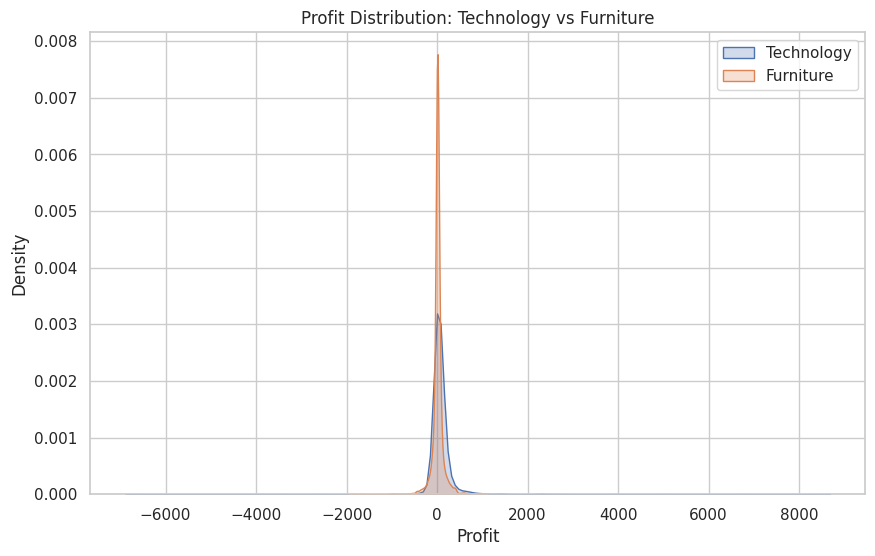

In [5]:
tech_profits = df[df['Category'] == 'Technology']['Profit']
furniture_profits = df[df['Category'] == 'Furniture']['Profit']

t_stat, p_val = stats.ttest_ind(tech_profits, furniture_profits, nan_policy='omit')

print(f"--- Hypothesis Testing Results ---")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: The difference is Statistically Significant (Real Problem).")
else:
    print("Conclusion: The difference is due to chance (No Real Problem).")

plt.figure(figsize=(10,6))
sns.kdeplot(tech_profits, label='Technology', fill=True)
sns.kdeplot(furniture_profits, label='Furniture', fill=True)
plt.title('Profit Distribution: Technology vs Furniture')
plt.legend()
plt.show()

--- ANOVA Results for Regions ---
F-Statistic: 2.6225
P-Value: 0.0489


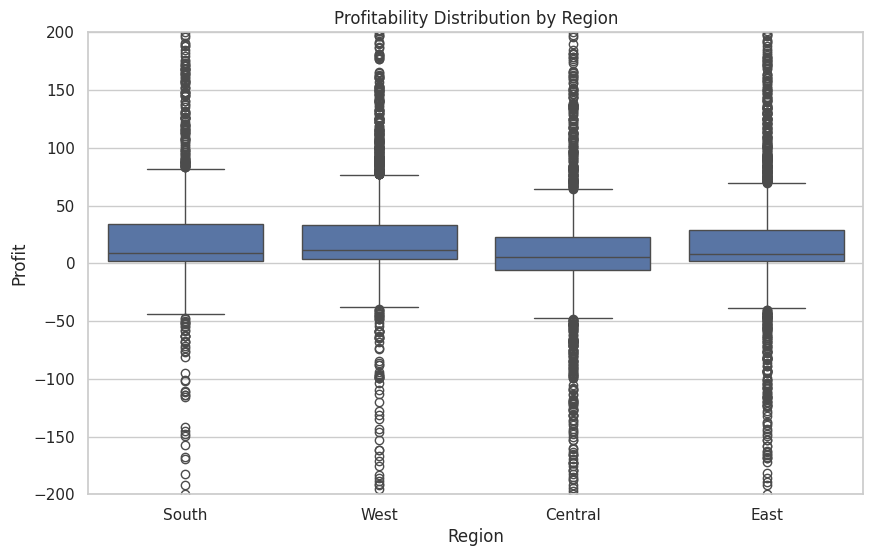

In [6]:
regions = df['Region'].unique()
region_data = [df[df['Region'] == r]['Profit'] for r in regions]
f_stat, p_val_anova = stats.f_oneway(*region_data)
print(f"--- ANOVA Results for Regions ---")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val_anova:.4f}")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df)
plt.ylim(-200, 200)
plt.title('Profitability Distribution by Region')
plt.show()

--- contingency table ---
Ship Mode        First Class  Same Day  Second Class  Standard Class
Category                                                            
Furniture                327       119           427            1248
Office Supplies          910       326          1152            3638
Technology               301        98           366            1082

--- chi-square Results ---
chi-square Statistic: 3.5789
p-value: 0.7334


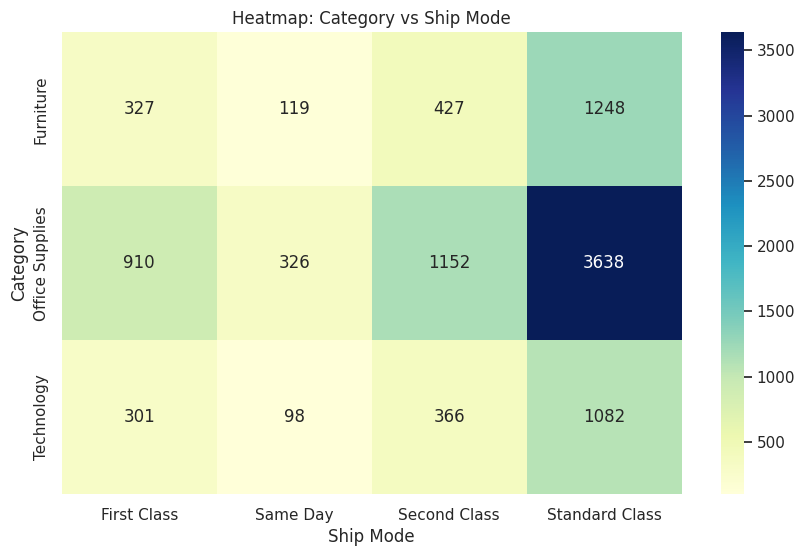

In [7]:
contingency_table = pd.crosstab(df['Category'], df['Ship Mode'])
print("--- contingency table ---")
print(contingency_table)
chi2, p_val_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\n--- chi-square Results ---")
print(f"chi-square Statistic: {chi2:.4f}")
print(f"p-value: {p_val_chi:.4f}")
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Category vs Ship Mode')
plt.show()

--- Tukey HSD Test Results ---
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  15.0431 0.0986  -1.7808  31.867  False
Central  South   11.765 0.4065   -7.714  31.244  False
Central   West  16.7563  0.043   0.3566 33.1561   True
   East  South  -3.2781 0.9697  -22.005 15.4487  False
   East   West   1.7132  0.992 -13.7857 17.2121  False
  South   West   4.9914 0.8975 -13.3553 23.3381  False
------------------------------------------------------

--- Two-Way ANOVA Table ---
                             sum_sq      df          F        PR(>F)
C(Region)              4.177774e+05     3.0   2.565728  5.276354e-02
C(Category)            5.884249e+06     2.0  54.206074  3.850540e-24
C(Region):C(Category)  2.884577e+05     6.0   0.885764  5.041872e-01
Residual               5.417896e+08  9982.0        NaN           NaN


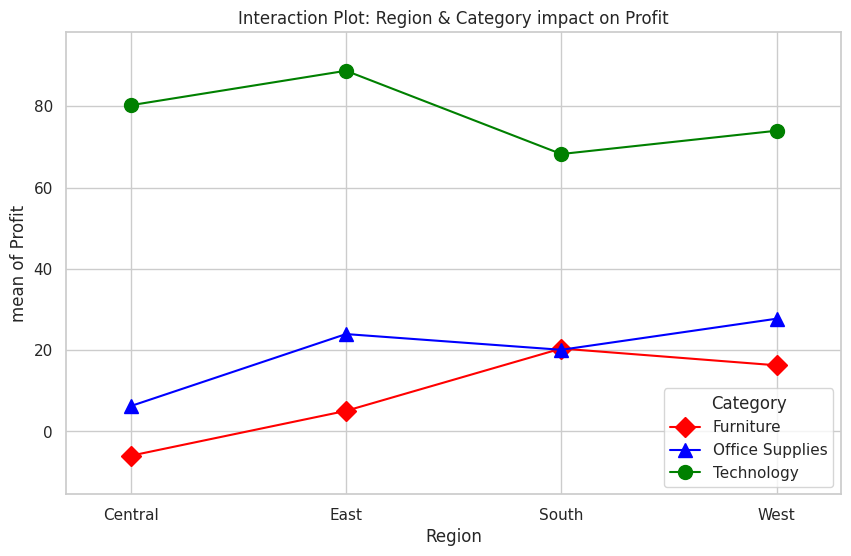

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Profit'], groups=df['Region'], alpha = 0.05)
print("--- Tukey HSD Test Results ---")
print(tukey)
model = ols('Profit ~ C(Region) + C(Category) + C(Region):C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n--- Two-Way ANOVA Table ---")
print(anova_table)
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(10,6))
fig = interaction_plot(x=df['Region'], trace=df['Category'], response=df['Profit'],
                       colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax)
plt.title('Interaction Plot: Region & Category impact on Profit')
plt.show()

--- Correlation Matrix ---
             Sales    Profit  Discount
Sales     1.000000  0.479064 -0.028190
Profit    0.479064  1.000000 -0.219487
Discount -0.028190 -0.219487  1.000000

--- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1866.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        14:12:45   Log-Likelihood:                -67126.
No. Observations:                9994   AIC:                         1.343e+05
Df Residuals:                    9991   BIC:                         1.343e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                   

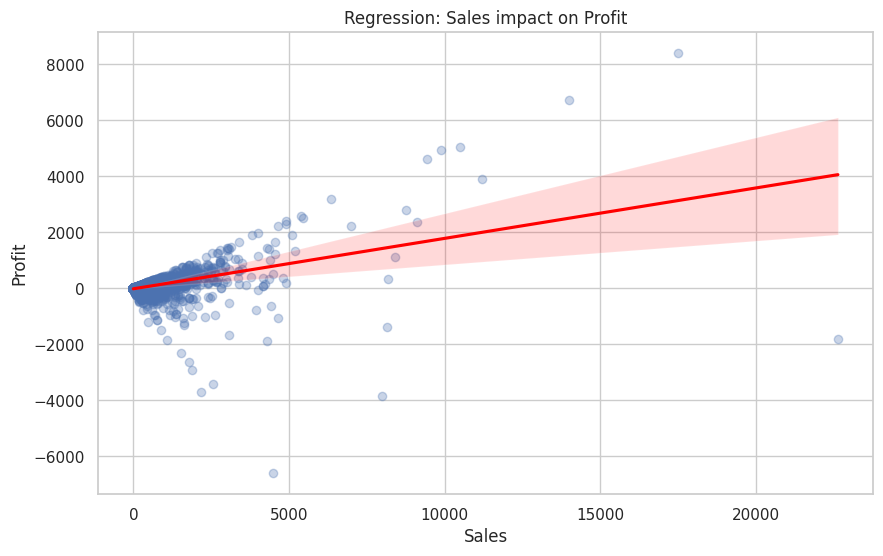

In [9]:
import statsmodels.api as sm
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()
print("--- Correlation Matrix ---")
print(correlation_matrix)
X=df[['Sales', 'Discount']]
X=sm.add_constant(X)
y=df['Profit']
model = sm.OLS(y, X).fit()
print("\n--- Regression Model Summary ---")
print(model.summary())
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Sales', y='Profit', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Regression: Sales impact on Profit')
plt.show()

In [10]:
new_data = [1, 2000, 0.10]
predicted_profit = model.predict(new_data)

print(f"Predicted Profit for this deal is: ${predicted_profit[0]:.2f}")

Predicted Profit for this deal is: $356.68



--- Confidence Intervals for Model Parameters ---
                   0           1
const      19.159279   29.454956
Sales       0.171590    0.184174
Discount -252.907716 -214.919033


/tmp/ipython-input-3271206349.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


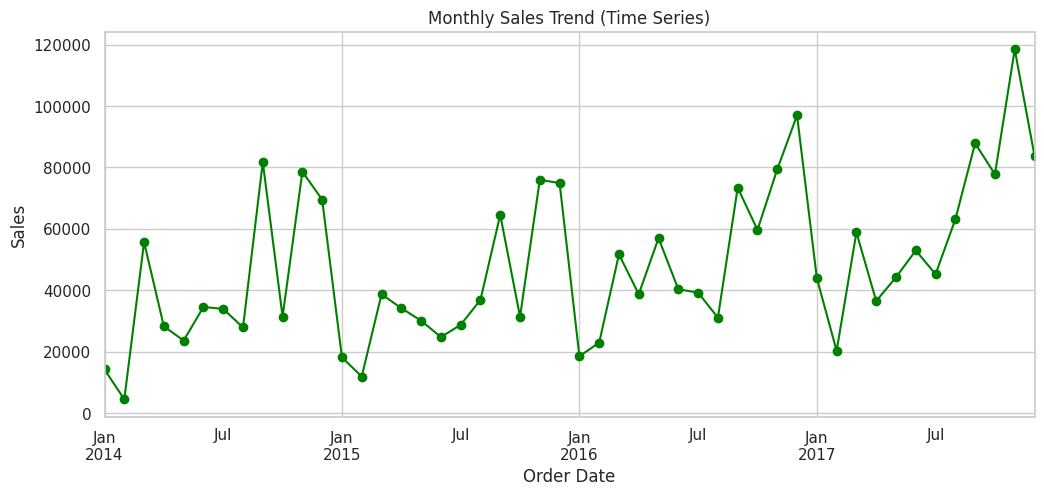

In [11]:
print("\n--- Confidence Intervals for Model Parameters ---")
print(model.conf_int())

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(color='green', marker='o')
plt.title('Monthly Sales Trend (Time Series)')
plt.ylabel('Sales')
plt.show()

In [12]:
data = df['Profit'].dropna()
mean = np.mean(data)
std_err = stats.sem(data)
h = std_err * stats.t.ppf((1+0.95)/ 2, len(data)-1)
print(f"We are 95% certain that the average trading volume for use is between:")
print(f"${mean - h:.2f}, ${mean + h:.2f}")

We are 95% certain that the average trading volume for use is between:
$24.06, $33.25


In [13]:
group_A = df[df['Region'] == 'East']['Profit']
group_B = df[df['Region'] == 'west']['Profit']
t_stat, p_val = stats.ttest_ind(group_A, group_B)
print(f"P-value for A/B Testing: {p_val:.4f}")
if p_val < 0.05:
  print("Decision: The new strategy in West has made a real difference, adopt it in the rest of the regions!")
else:
  print("Decision: There is no real difference; the new strategy has had no effect.")

P-value for A/B Testing: nan
Decision: There is no real difference; the new strategy has had no effect.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


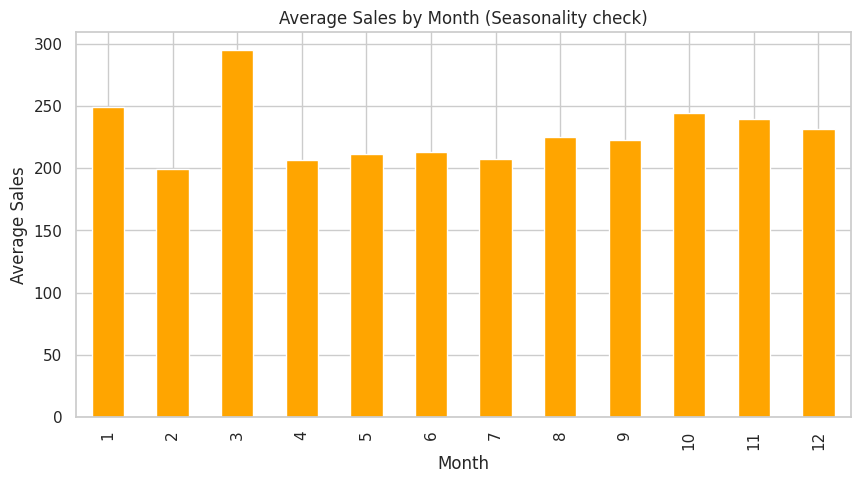

In [16]:
df['Month'] = df['Order Date'].dt.month
seasonal_impact = df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10, 5))
seasonal_impact.plot(kind='bar', color= 'orange')
plt.title('Average Sales by Month (Seasonality check)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()